# Introducción a Machine Learning
## Aprendizaje Supervisado - Clasificación

En el aprendizaje Supervisado, `tenemos el Y (Etiqueta)`. Es la principal diferencia con el No Supervisado.

En este notebook comenzamos a trabajar en los problemas de __Clasificación__, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Clasificación en Machine Learning consiste en aprender __etiquetas categóricas discretas__ y a partir de un conjunto de features X (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

Vamos a comenzar introduciendo un dataset sintético de dos features y dos clases. Y trataremos de aprender a clasificarlo usando nuestro primer modelo, un __Árbol de Decisión__. Haremos esto utilizando la librería __Scikit-Learn__.

## 1. Ejemplo demostrativo

### 1.1 Generando nuestro dataset
Vamos a generar automáticamente un grupo de 1000 instancias con __features llamados x1 y x2__ - agrupados en una única __variable X__- a los cuales les vamos a asignar una __etiqueta y__, la cual puede valer 0 y 1. Esto lo haremos utilizando una función que ya viene incorporada en Scikit-Learn, make_blobs. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético.

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.3) #random_state=0 hace que siempre tire los mismos valores.

Ahora vamos a graficar las diferentes instancias que generamos como puntos en el plano (x1,x2) y les asignamos un color distinto segun cual sea su etiqueta y:

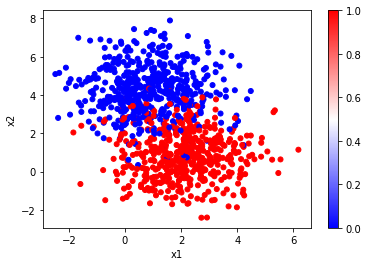

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 1.2 Modelo: Árbol de decisión
El primer modelo de clasificación que vamos a utilizar es un Árbol de decisión. Veremos en detalle árboles de decisión durante el siguiente encuentro. Por ahora basta que consideres que es un objeto que, dadas varias instancias con un determinados grupo de features X y unas determinadas etiquetas objetivo y, el árbol de desición __aprende automáticamente reglas__ (de mayor a menor importancia) sobre cada feature de manera de __poder decidir qué etiqueta le corresponde a cada instancia__.

Si queremos entrenar un árbol de decisión para clasificar nuestras instancias, primero debemos crear un objeto correspondiente al modelo. Este objeto será de de la clase DecisionTreeClassifier, la cual importamos desde la librería Scikit-Learn.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [6]:
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

El modelo ya está entrenado. Esto significa que contamos con una herramienta que, dadas ciertas características de una instancia - pares (x1 y x2) - nos devuelve qué etiqueta y el modelo cree que le corresponde. Esto lo podemos hacer utilizando el método __predict(...)__, que también poseen todas las clases correspondientes a modelos de Scikit-Learn. Veamos algunos ejemplos:

1. Inventando instancias.

In [7]:
instancia = np.array([4,0]) # el primer valor corresponde a x1 y el segundo x2
print (instancia)
instancia = instancia.reshape(1,-1) # Es para alcanzar la matriz
print (instancia)
y_pred = tree.predict(instancia) # Hacemos la predicción
print(y_pred) # imprimimos en pantalla la predicción

[4 0]
[[4 0]]
[1]


¿Estás de acuerdo con la etiqueta asignada? Mirá en el gráfico del set de entrenamiento si estás de acuerdo con la etiqueta que nos devolvió.

Sí, porque la mayoría de los puntos ubicados en 4,0, son 1.

2. Tomando instancias del set de entrenamiento.

In [8]:
### Tomamos las instancias al azar
np.random.seed(3) # si quieres que sea al azar, cambia la semilla o comenta esta linea.
n = 3
idxs = np.random.randint(X.shape[0], size=3)
instancias = X[idxs,:]
print(instancias)

[[1.24204338 2.18744154]
 [2.25133119 0.56555164]
 [2.36709476 1.10430994]]


In [9]:
### Predecimos
y_pred = tree.predict(instancias)
print(y_pred)

[0 1 1]


In [10]:
### Comparamos la etiqueta real con la predicha:

for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

Instancia 874. Etiqueta real: 1. Etiqueta predicha: 0
Instancia 664. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 249. Etiqueta real: 1. Etiqueta predicha: 1


Ejecuta varias veces las tres celdas superiores. ¿El modelo acierta siempre? Selecciona alguna instancia cuya etiqueta no funcione y observa sus valores. ¿Por qué crees que falla? Por ejemplo, la 874:

In [11]:
k = 874
print(X[k,:])

[1.24204338 2.18744154]


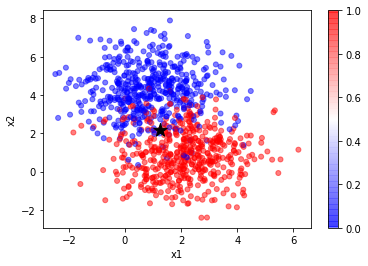

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr', alpha = 0.5)
plt.colorbar()
plt.scatter(X[k, 0], X[k, 1], c = 'k', s=200, cmap='bwr', marker = '*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Volvamos sobre un aspecto del clasificador: dadas características x1 y x2 de una instancia, nos dice qué etiqueta y (0: azul, 1: rojo) le corresponde. Podemos pensar que el clasificador pinta el plano x1,x2 de acuerdo al color que cree que corresponde. Si hay regiones azules y regiones rojas, debe existir una frontera donde el color cambie. Tratemos de visualizarla.

La función que definimos en la siguiente celda nos permite explorar cómo es el dominio de decisión de nuestro arbol una vez que lo entrenamos.

In [13]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.

def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-13-3cfbe002722f>:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


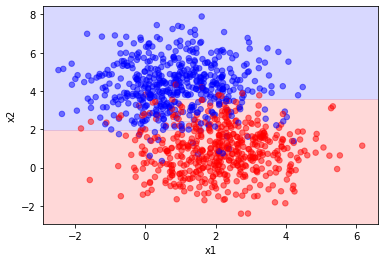

In [14]:
visualize_classifier(tree, X, y)

En este gráfico aquellos puntos (instancias) que queden sobre un fondo de su mismo color son aquellos que están bien clasificados por el modelo. Esto quiere decir que que si usamos el modelo para calificar su etiqueta y a partir de sus coordenadas x1 y x2, éste nos daría la misma etiqueta original del punto. En cambio, aquellos puntos que queda sobre un fondo de otro color son puntos para los cuales el modelo nos estaría dando una etiqueta distinta a la etiqueta original de esa instancia.

Nos podríamos preguntar luego: ¿cuál es el porcentaje de instancias bien clasificadas por el modelo? Para responder esto usaremos nuevamente el método __predict__ sobre todo el dataset X. Luego con la función __accuracy_score__ podemos calcular el porcentaje de aciertos que obtenemos al comparar nuestra predicción __y_pred__ contra la clase original y.

In [15]:
from sklearn.metrics import accuracy_score # Es una clase disponible dentro de sklearn.

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y,y_pred)

0.905

Esto quiere decir que el clasificador asigna la etiqueta correcta en el 90.5% de los casos.

Otra forma de ver los resultados de nuestro clasificador es la matriz de confusión. La matriz de confusión es una tabla de doble entrada, donde un eje corresponde a la etiqueta real y otro a la etiqueta predicha. En la diagonal encontramos los aciertos, mientras que por fuera de la diagonal aquellas instancias mal clasificadas.

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))
# Indica para cuantas x1 y x2 acertó. Predijo que era 1 y era 1 en x ocaciones. Predijo 1 pero era 0 en x ocaciones.. etc..

[[439  61]
 [ 34 466]]


Una forma más interesante de ver esta información es con la función __plot_confusion_matrix__:

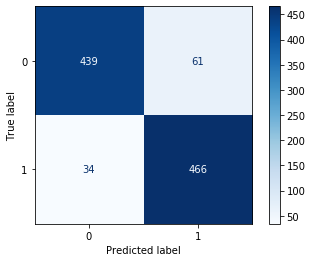

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f')

O podemos obtener una versión __normalizada__ (por eso el *True*):

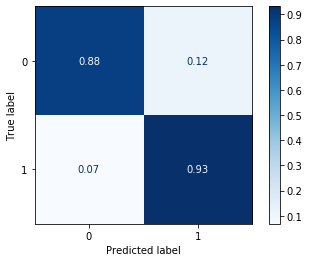

In [18]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f', normalize= 'true')

## Challenge - Para pensar y probar:

1. ¿Qué ocurre si modificas el valor de cluster_std en la función make_blobs?¿En qué casos será más fácil - o difícil - la tarea de clasificación?
2. ¿Qué ocurre si modificas el valor de centers en la función make_blobs?¿En qué cambia la formulación del problema de clasificación?
3. Hay algunas características de esta formulación que tal vez te llamen la atención. En el caso binario, un problema de clasificación consiste en encontrar una frontera entre puntos que deje a un lado los que pertenecen a una clase, y del otro lado los puntos de la otra clase. Para convencerse (¡o no!):  
    3.1. Elegir un problema de Clasificación Binario (al estilo Spam/No-Spam, Titanic Sobrevivió/No-Sobrevivió, etc.). Inventar - a mano - dos atributos, algunas instancias, y graficar. Luego, dibujar una frontera de decisión (siempre a mano, no tienen que programar). Un ejemplo podría ser: para clasificar vinos blancos y vinos tintos, un atributo podría ser el color y el otro podría ser el dulzor.  
    3.2. ¿Qué ocurre si en lugar de dos atributos tenemos tres?¿Qué forma tendrá la frontera? Y si en vez de tres atributos tenemos cuatro?¿Se podrá visualizar?  
    3.3. Extra: googlea qué es la maldición de la dimensión/dimensionalidad (curse of dimensionality).

In [19]:
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.0) # cluster std es la desviación estándar de los grupos

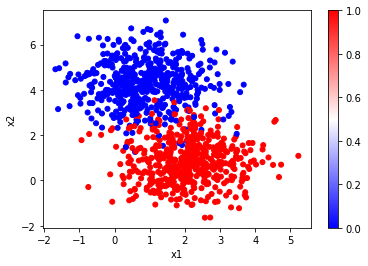

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

1. Será más fácil la tarea cuando la desviación estándar sea normal.

2. Dado que Si n_samples tiene forma de matriz, los centros deben ser None o una matriz de longitud igual a la longitud de n_samples.

3. Muchas tareas de ciencia de datos a menudo exigen que trabajemos con dimensiones más altas en los datos. En términos de modelos de aprendizaje automático, a menudo tendemos a agregar varias características para captar características destacadas, aunque no nos proporcionarán ninguna cantidad significativa de información nueva. Usando estas características redundantes, el rendimiento del modelo se deteriorará después de un tiempo. Este fenómeno a menudo se conoce como __"la maldición de la dimensionalidad"__ .  
Cuando seguimos agregando entidades sin aumentar los datos utilizados para entrenar el modelo, las dimensiones del espacio de entidades se vuelven escasas ya que la distancia promedio entre los puntos aumenta en el espacio dimensional alto.
También se conoce como __sobreajuste__.